In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # ignore the warnings

pd.set_option('display.max_columns',None) # To see all the columns in dataset

## Data Analysis

### Descriptive Analysis 

In [2]:
# Load the dataset
data = pd.read_csv('housing data.csv',na_values=['?'])
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [3]:
# No. of rows and columns in dataset
print('No of rows:',data.shape[0],'\nNo of columns:',data.shape[1])

No of rows: 1418 
No of columns: 13


In [4]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


Inference: The info of the data shows that there are missing values in Electrical, Garage Type, Fence and Misc Features

In [5]:
# Five point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


The summary shows that there is chance of outliers in columns TotalBsmntSF, GrLivArea, GarageArea, SalePrice

In [6]:
data.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


In [7]:
# Identify the numeric columns and category columns in the dataset
num_cols = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cat_cols = ['OverallQual','Electrical','FullBath','GarageType','GarageCars',
           'Fence','MiscFeature']

In [8]:
data.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


<AxesSubplot:>

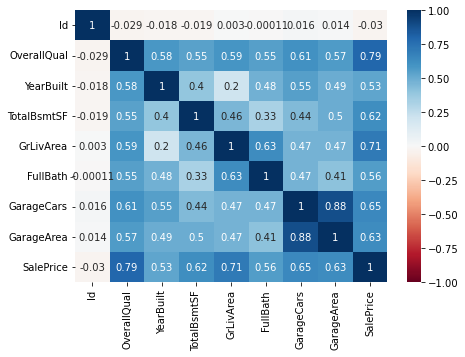

In [9]:
# Correlation plot
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)

In [10]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

In [11]:
# Lets remove id as it makes no sense in the data
del data['Id']

In [12]:
data.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

### Univariate Analysis on the data

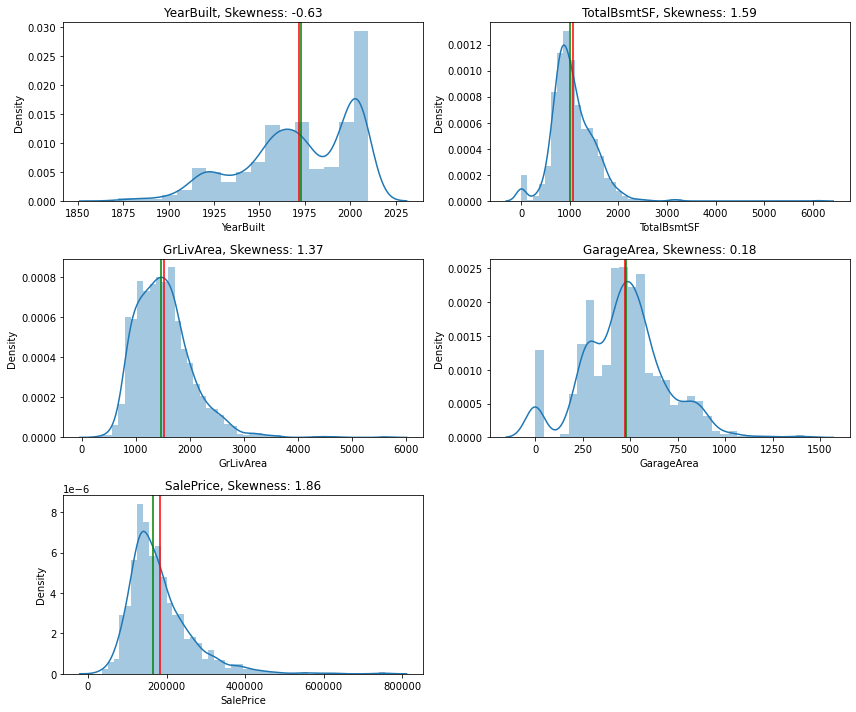

In [13]:
# Number Columns
plt.figure(figsize=(12,10))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.distplot(data[i])
    plt.axvline(data[i].mean(),color='r')
    plt.axvline(data[i].median(),color='g')
    t+=1
plt.tight_layout()
plt.show()

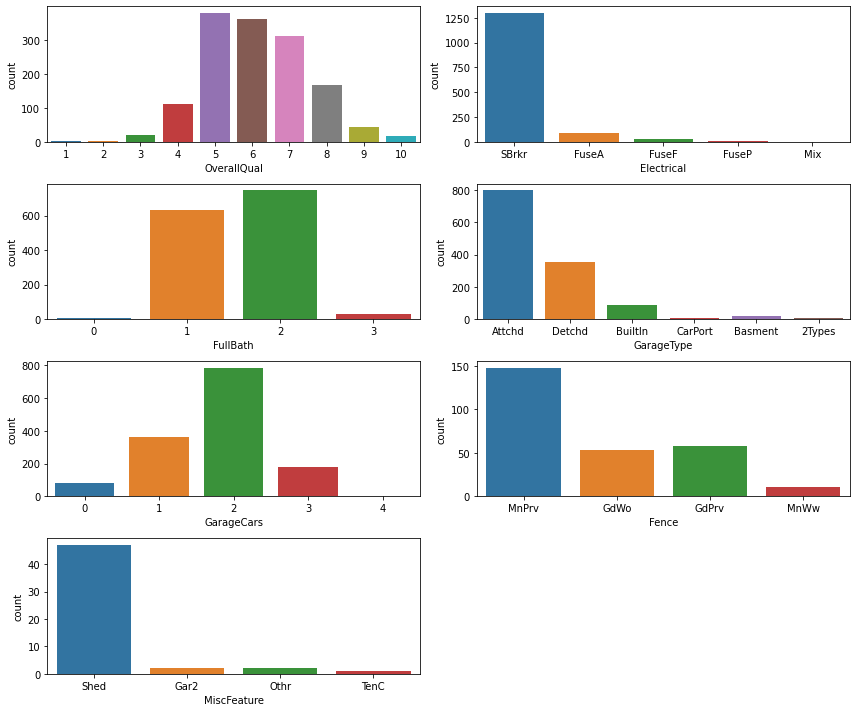

In [14]:
# Category columns
plt.figure(figsize=(12,10))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data = data,x=i)
    t+=1
plt.tight_layout()
plt.show()

### Bivaraite Analysis

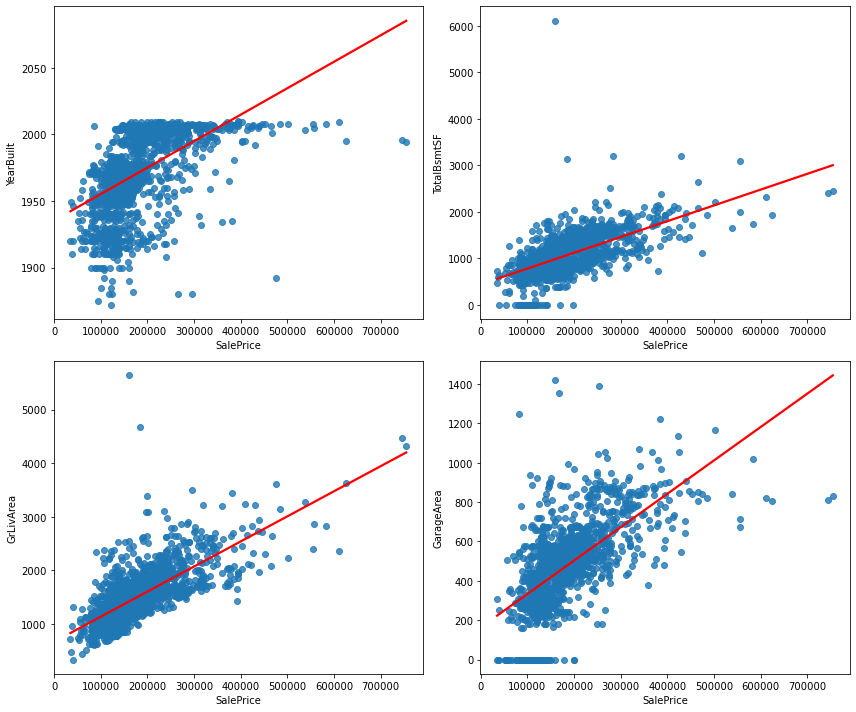

In [15]:
# Number Vs Number
plt.figure(figsize=(12,10))
t=1
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],ci=0,line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()
        

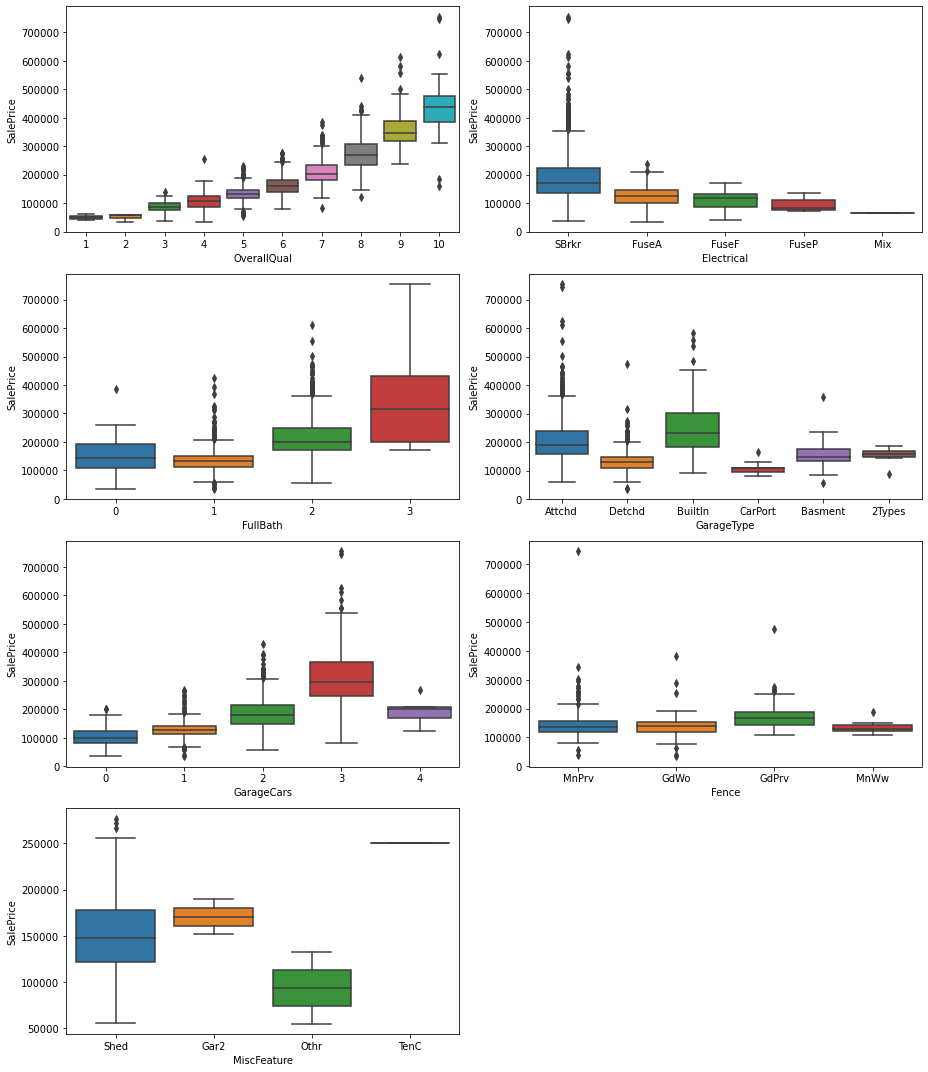

In [16]:
# Number Vs Category
plt.figure(figsize=(13,15))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=data,x=i,y='SalePrice')
    t+=1
plt.tight_layout()
plt.show()

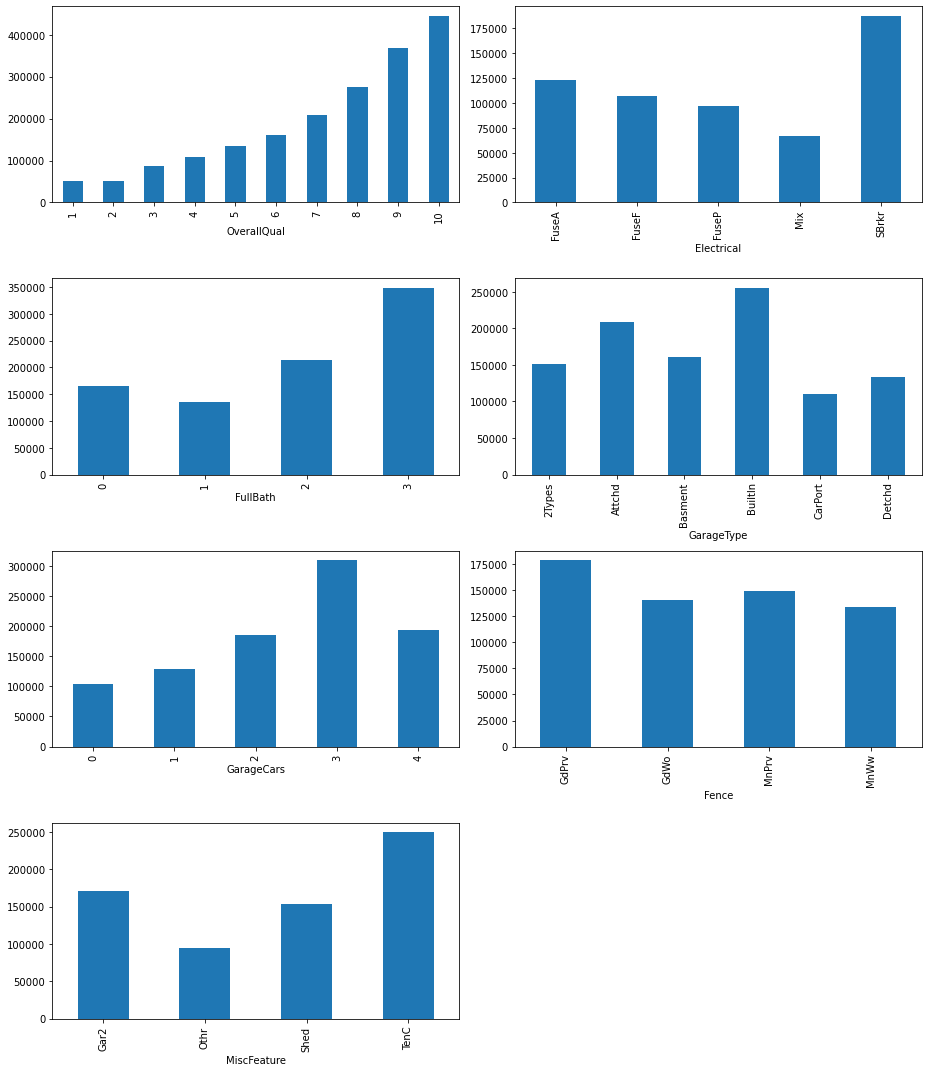

In [17]:
plt.figure(figsize=(13,15))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

### Satistical Analysis

#### Key Inferences
* YearBuilt, GrLivArea, TotalBsmtSF and GarageArea are related to the slae price
* BuiltQual, Electrical, FullBath, GarageType and GarageCars are affecting the SalePrice 

In [18]:
# Lets explore yearbuilt and Saleprice statistically

In [19]:
# Assumptions : Data must be normal

# Ho: The data is normal
# Ha: The data is not normal


print(stats.shapiro(data['SalePrice']))
print(stats.shapiro(data['YearBuilt']))

# Since both pvalues are less than 0.05 we have to reject Ho. SO we can go with spearman's correlation
# test (non parametric)

ShapiroResult(statistic=0.8717886209487915, pvalue=1.371634693338205e-32)
ShapiroResult(statistic=0.9247534275054932, pvalue=4.7268936789807727e-26)


In [20]:
# Spearman's correlation test
# Ho: Samples are independent
# Ha: Samples are dependent

print(stats.spearmanr(data['SalePrice'],data['YearBuilt']))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)


In [21]:
for i in num_cols:
    if i != 'SalePrice':
        print(stats.spearmanr(data['SalePrice'],data[i]))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)
SignificanceResult(statistic=0.610789140940605, pvalue=9.424659979319682e-146)
SignificanceResult(statistic=0.7352976571006725, pvalue=1.7737764527778764e-241)
SignificanceResult(statistic=0.6598555665561451, pvalue=5.419048779956526e-178)


In [22]:
# Lets proove statistically the affect of garagetype on Saleprice

In [23]:
data['GarageType'].unique()

array(['Attchd', 'Detchd', nan, 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [24]:
# Kruskal Walli's Test
# Ho: mu1=mu2=...mu6
# Ha: atleast one mean is different

s1 = data[data['GarageType']=='Attchd']['SalePrice']
s2 = data[data['GarageType']=='Detchd']['SalePrice']
s3 = data[data['GarageType']=='BuiltIn']['SalePrice']
s4 = data[data['GarageType']=='CarPort']['SalePrice']
s5 = data[data['GarageType']=='Basment']['SalePrice']
s6 = data[data['GarageType']=='2Types']['SalePrice']

print(stats.kruskal(s1,s2,s3,s4,s5,s6))

KruskalResult(statistic=440.6623751087267, pvalue=5.0735517569761e-93)


## Data Preprocessing

### Feature Engineering

In [25]:
# We will create  a new column age by assuming the tha data was collected
# in 2010. We will subtract 2010 and yearbuilt.

data['Age'] = 2010 - data['YearBuilt']

data.drop(columns=['YearBuilt'],inplace=True)
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,7
1,6,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,34


<AxesSubplot:xlabel='SalePrice', ylabel='Age'>

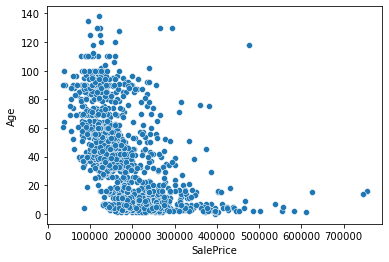

In [26]:
sns.scatterplot(x=data['SalePrice'],y=data['Age'])

In [27]:
data[['SalePrice','Age']].corr()

,SalePrice,Age
SalePrice,1.000000,-0.528006
Age,-0.528006,1.000000


### Missing Values

In [28]:
missing_pec = ((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

In [29]:
missing_pec[missing_pec>0]

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
dtype: float64

In [30]:
# Missing value Value

# Closest fit
# Central Value imputation
# Deletion (Lot of data is missing in a column or very few rows in the data
# has missing columns)

In [31]:
# Lets treat the missing value in Electrical

data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1339,5,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500,4


In [32]:
# Central value imputation
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [33]:
data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


In [34]:
data.groupby(by='GarageCars')['GarageType'].describe(include=object)

,count,unique,top,freq
GarageCars,,,,
0,0,0,NaN,NaN
1,302,5,Detchd,178
2,787,6,Attchd,556
3,181,4,Attchd,138
4,5,3,Detchd,3


In [35]:
# Lets treat missing values in GarageType
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
37,4,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000,55
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70
1407,5,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000,40
1408,5,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000,36
1411,5,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500,4


In [36]:
# Lets impute the missing values where garage area and garage cars are 0
# with new category 'NoGarage'

data['GarageType'] = np.where((data['GarageArea']==0)&(data['GarageCars']==0),
                             'NoGarage',
                             data['GarageType'])

In [37]:
data[data['GarageType'].isnull()]['GarageCars'].value_counts()

1    62
Name: GarageCars, dtype: int64

In [38]:
# Since mode of GarageType where garageCars is 1 is 'Detchd'
data['GarageType'].fillna('Detchd',inplace=True)

In [39]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


In [40]:
data.GarageType.value_counts()

Attchd      800
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [41]:
# Lets treat missing values in Fence
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [42]:
# Lets bin this data into 0-Fence not present, 1-Fence present

data['Fence'] = np.where(data['Fence'].isnull(),0,1)

In [43]:
data['Fence'].value_counts()

0    1148
1     270
Name: Fence, dtype: int64

In [44]:
# Lets validate this statically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['Fence']==0]['SalePrice'],
                  data[data['Fence']==1]['SalePrice'])

MannwhitneyuResult(statistic=201362.0, pvalue=1.842459050609252e-14)

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

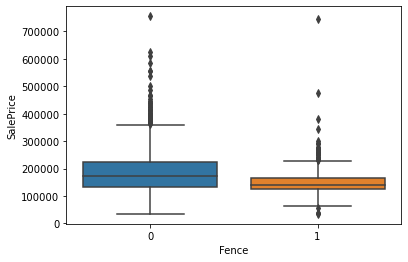

In [45]:
sns.boxplot(x=data['Fence'],y=data['SalePrice'])

In [46]:
# Lets treat missing values in MiscFeature
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [47]:
# Lets assume Nan's here means no Misc Feature
# 1 - MiscFeature Yes
# 0 - MiscFeature No
data['MiscFeature'] = np.where(data['MiscFeature'].isnull(),0,1)
data['MiscFeature'].value_counts()

0    1366
1      52
Name: MiscFeature, dtype: int64

In [48]:
# Lets validate this statically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['MiscFeature']==0]['SalePrice'],
                  data[data['MiscFeature']==1]['SalePrice'])

MannwhitneyuResult(statistic=42639.5, pvalue=0.013980740442174018)

<AxesSubplot:xlabel='MiscFeature'>

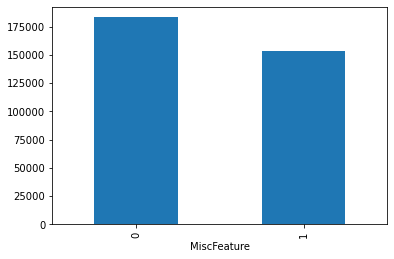

In [49]:
data.groupby(by='MiscFeature')['SalePrice'].mean().plot(kind='bar')

In [50]:
data.isnull().sum()

OverallQual    0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
Fence          0
MiscFeature    0
SalePrice      0
Age            0
dtype: int64

### Outlier Treatment

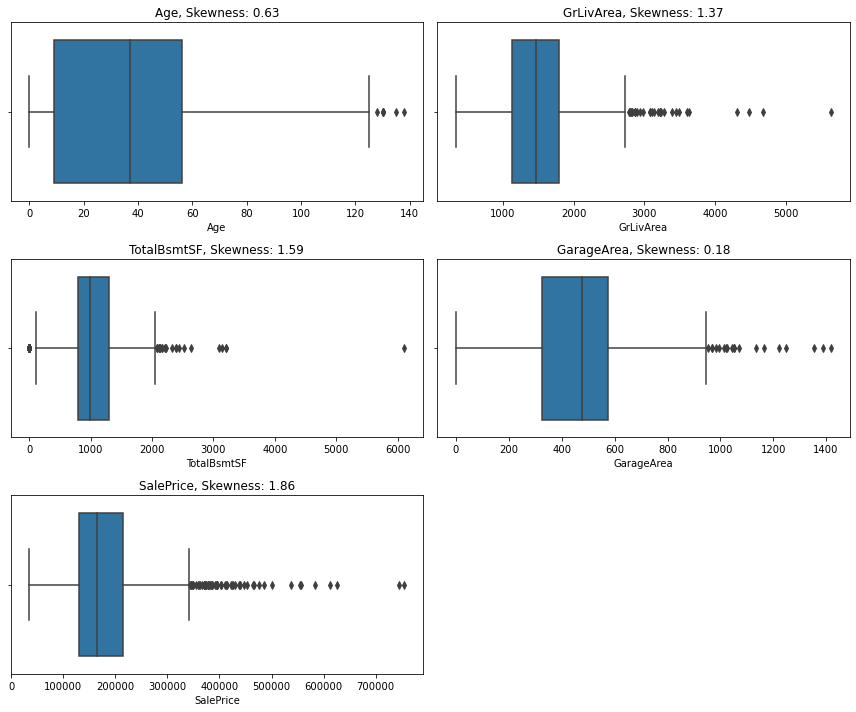

In [51]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [52]:
data[data['TotalBsmtSF']>6000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [53]:
data[data['GrLivArea']>5000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [54]:
data[data['SalePrice']>700000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
665,10,2444,SBrkr,4316,3,Attchd,3,832,0,0,755000,16
1147,10,2396,SBrkr,4476,3,Attchd,3,813,1,0,745000,14


In [55]:
data.drop(index=[1260],inplace=True)

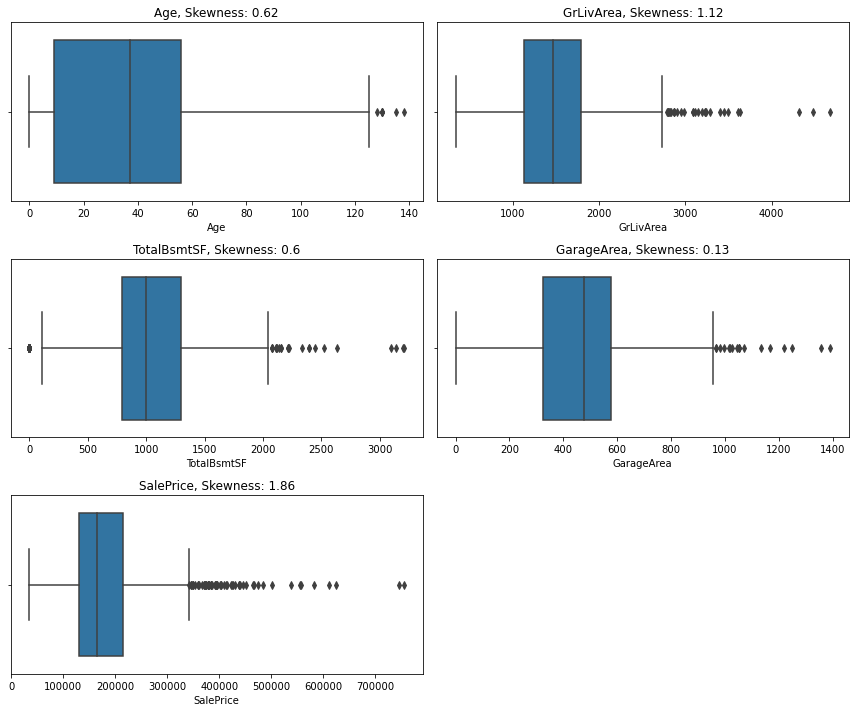

In [56]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [57]:
# Cap the outliers
# Remove the outliers

In [58]:
# Lets cap the outliers to 99th percentile in GarageArea,
# TotalbsmtSF, GrLivArea

for i in ['GarageArea','TotalBsmtSF','GrLivArea']:
    ul = np.percentile(data[i],99)
    data[i] = np.where(data[i]>ul,ul,data[i])

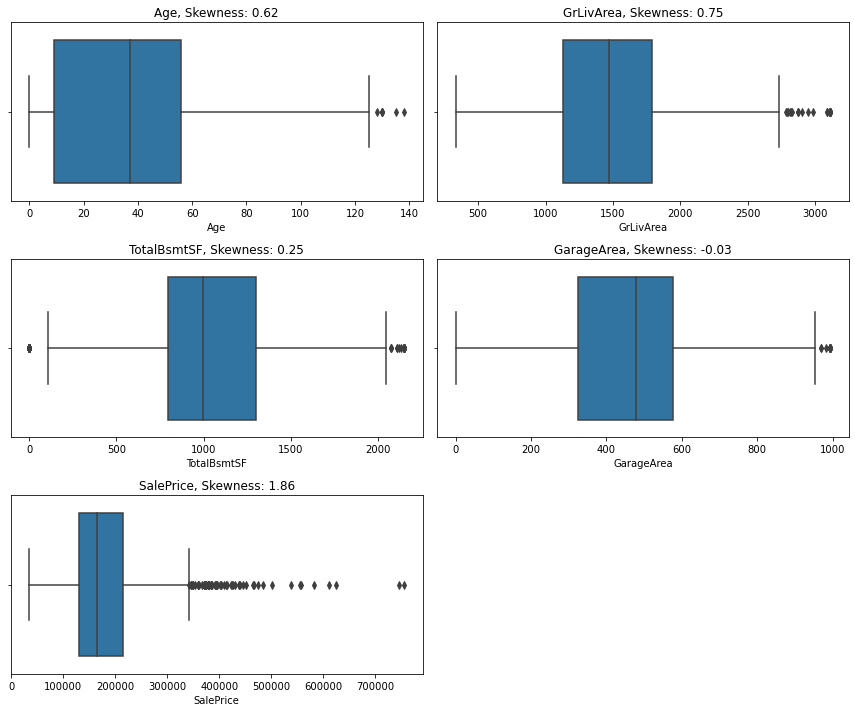

In [59]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

### Feature Scalling

In [60]:
# min_max scaler
# Standard Scaling
# Robust Scalling

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

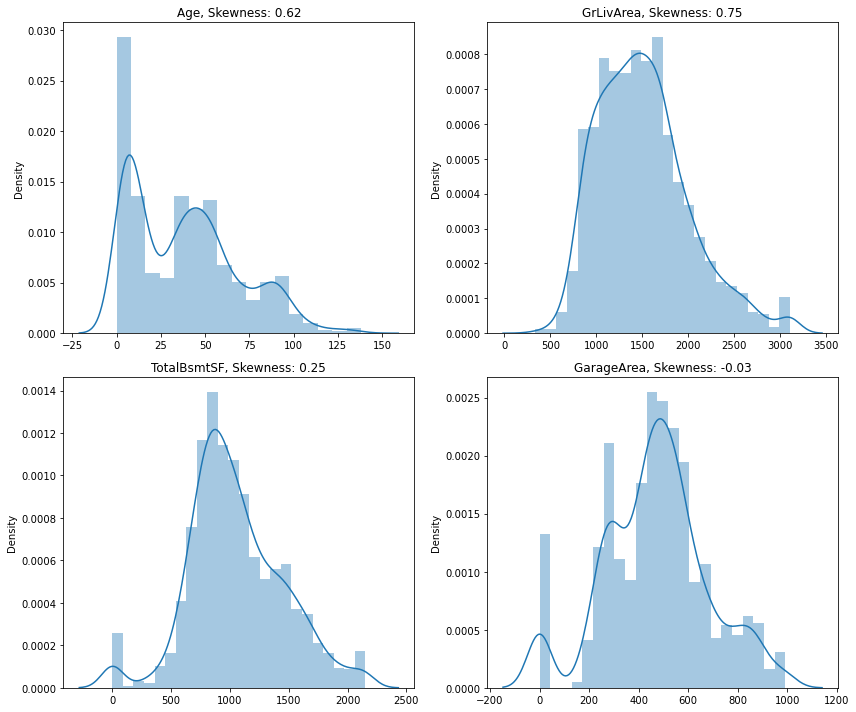

In [61]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(2,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [62]:
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    scale = RobustScaler()
    data[i] = scale.fit_transform(pd.DataFrame(data[i]))

In [63]:
data.head()

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,-0.272727,SBrkr,0.370031,2,Attchd,2,0.277778,0,0,208500,-0.638298
1,6,0.529644,SBrkr,-0.314985,2,Attchd,2,-0.071429,0,0,181500,-0.063830
2,7,-0.146245,SBrkr,0.486239,2,Attchd,2,0.515873,0,0,223500,-0.595745
3,7,-0.470356,SBrkr,0.380734,1,Detchd,3,0.650794,0,0,140000,1.234043
4,8,0.298419,SBrkr,1.116208,2,Attchd,3,1.420635,0,0,250000,-0.574468


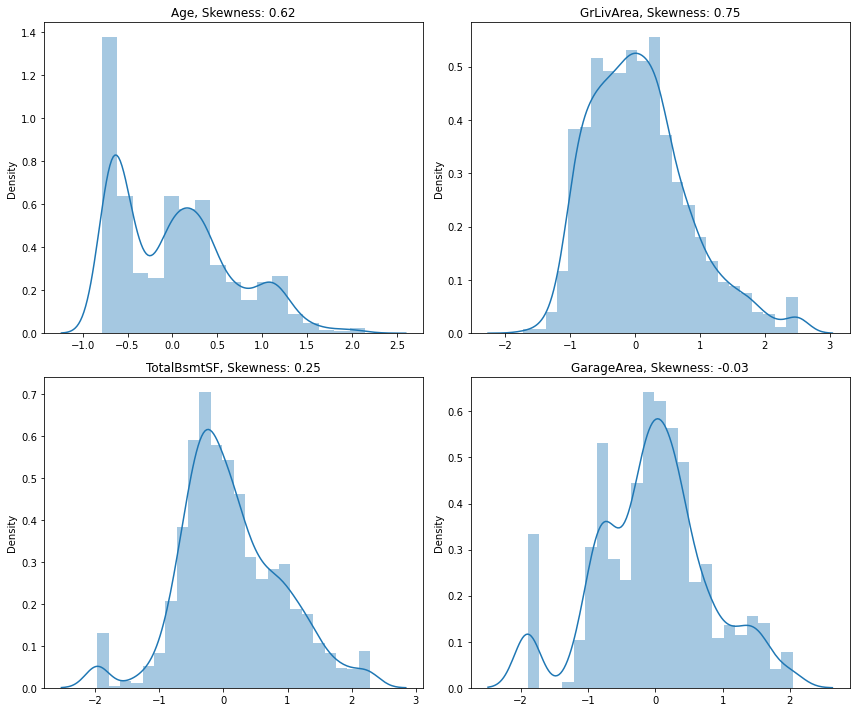

In [64]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(2,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

### Feature Transformation

In [65]:
# To reduce the skewness or make the data normal we do feature transformation
# sqrt tranformation
# cuberoot tranformation
# Log tranformation
# Boxcox tranformation
# Yeo Jhonsons tranformation

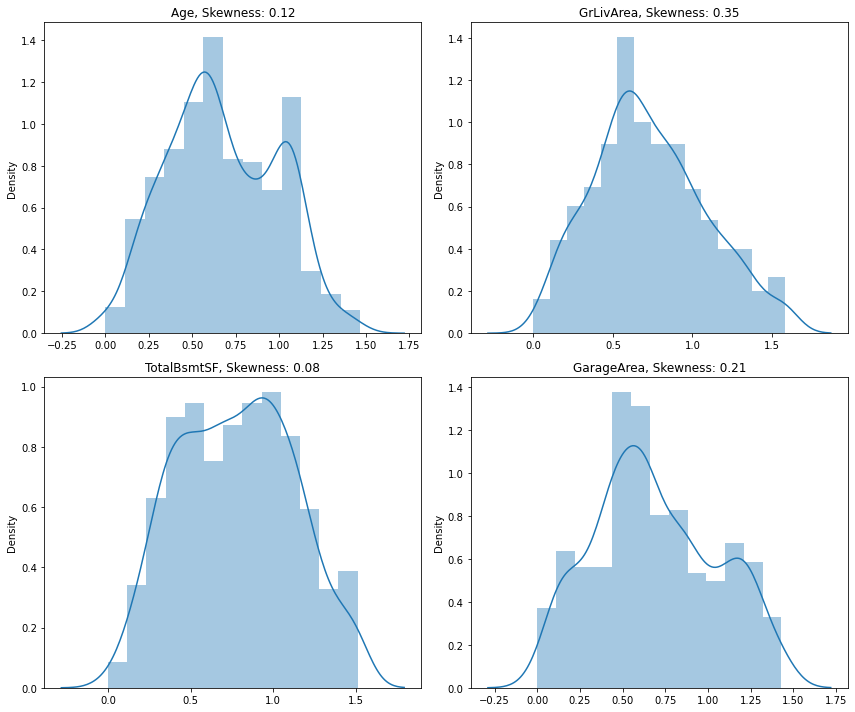

In [66]:
# Sqrt tranformation - not applicable when data has -ve values
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(2,2,t)
    plt.title(f'{i}, Skewness: {round(np.sqrt(data[i]).skew(),2)}')
    sns.distplot(x=np.sqrt(data[i]))
    t+=1
plt.tight_layout()
plt.show()

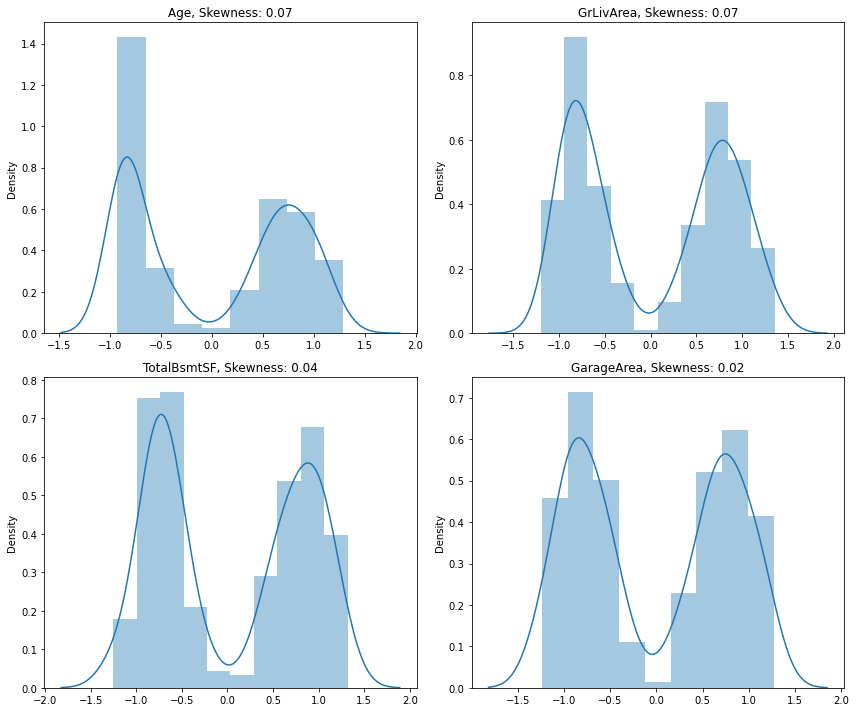

In [67]:
# Sqrt tranformation - not applicable when data has -ve values
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(2,2,t)
    plt.title(f'{i}, Skewness: {round(np.cbrt(data[i]).skew(),2)}')
    sns.distplot(x=np.cbrt(data[i]))
    t+=1
plt.tight_layout()
plt.show()

In [68]:
np.sqrt(-23)

nan

In [69]:
np.log(-67)

nan

In [70]:
np.log(0)

-inf

In [71]:
# Box -cox tranformation

from sklearn.preprocessing import PowerTransformer

In [72]:
pt = PowerTransformer(standardize=False)

In [73]:
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    data[i] = pt.fit_transform(pd.DataFrame(data[i]))

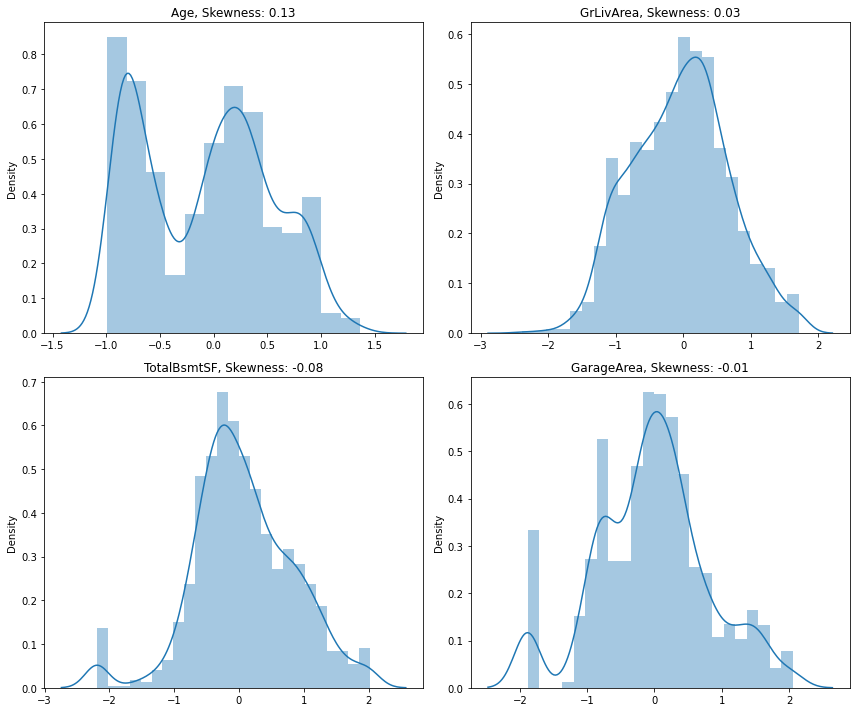

In [74]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(2,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [75]:
pt.lambdas_

array([1.009799])

### Encoding

In [76]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,-0.278633,SBrkr,0.339389,2,Attchd,2,0.278125,0,0,208500,-0.774743
1,6,0.509631,SBrkr,-0.340046,2,Attchd,2,-0.071404,0,0,181500,-0.065261


In [77]:
data['Electrical'].value_counts()

SBrkr    1300
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [78]:
data['Electrical'] = np.where(data['Electrical']=='SBrkr',1,0)
data.head()

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,-0.278633,1,0.339389,2,Attchd,2,0.278125,0,0,208500,-0.774743
1,6,0.509631,1,-0.340046,2,Attchd,2,-0.071404,0,0,181500,-0.065261
2,7,-0.147997,1,0.435661,2,Attchd,2,0.516999,0,0,223500,-0.714978
3,7,-0.487156,1,0.348432,1,Detchd,3,0.652528,0,0,140000,0.906443
4,8,0.291601,1,0.899113,2,Attchd,3,1.427705,0,0,250000,-0.685514


In [79]:
data['GarageType'].value_counts()

Attchd      799
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [80]:
def garagetype(s):
    if s in ['Basment','CarPort','2Types']:
        return 'Others'
    else:
        return s

In [81]:
data['GarageType'] = data['GarageType'].apply(garagetype)

In [82]:
data['GarageType'].value_counts()

Attchd      799
Detchd      416
BuiltIn      87
NoGarage     81
Others       34
Name: GarageType, dtype: int64

In [83]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,-0.278633,1,0.339389,2,Attchd,2,0.278125,0,0,208500,-0.774743
1,6,0.509631,1,-0.340046,2,Attchd,2,-0.071404,0,0,181500,-0.065261


In [86]:
dicti = round(data.groupby(by='GarageType')['SalePrice'].mean(),0).to_dict()

In [87]:
dicti

{'Attchd': 208760.0,
 'BuiltIn': 255680.0,
 'Detchd': 133853.0,
 'NoGarage': 103317.0,
 'Others': 145535.0}

In [88]:
data['GarageType'] = data['GarageType'].map(dicti)

In [89]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,-0.278633,1,0.339389,2,208760.0,2,0.278125,0,0,208500,-0.774743
1,6,0.509631,1,-0.340046,2,208760.0,2,-0.071404,0,0,181500,-0.065261


<AxesSubplot:xlabel='SalePrice', ylabel='GarageType'>

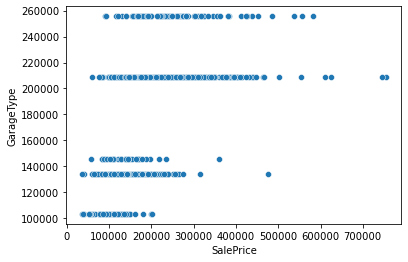

In [91]:
sns.scatterplot(x=data['SalePrice'],y=data['GarageType'])